In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Ts=collect(290.0:50:1200.0)
#Ts=collect(663.8:0.01:664.0)#[663.0,663.1]
numofn=[-17.5e19]#,-7.3e19,-2.5e19,-0.15e19]#,-7.3e19,-2.0e19,-0.15e19]#,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample e-1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]#,1.8e17,2.3e17,2.3e17]#,1e17,1e17,1e17]#,1e17]
xs=[0.2]#,0.3,0.3,0.3]#,0.3,0.3,0.3]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=5.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2])#var[1]:T var[2]:x
Ec2(var)=Ec(var)+0.8
alphaC(var)=1.4#1/EgSiGe(var[2],var[4])
alphaV(var)=0.0

effMassV(var)=-1.2*me
effMassC(var)=0.321me#0.321me#1.4/6^(2/3)*me#0.321me#0.424*me#0.424*me#1.4/6^(2/3)*me
effMassC2(var)=0.22me#

bandC=parBandTx(true,6.0,effMassC(var0),alphaC(0.0),Ec(var0),[Ec],[effMassC],[alphaC],var0,)
bandC2=parBandTx(true,4.0,effMassC2(var0),alphaC(0.0),Ec2(var0),[Ec2],[effMassC2],[alphaC],var0)
bandV=parBandTx(false,1.0,effMassV(var0),alphaV(0.0),Ev(var0),[Ev],[effMassV],[alphaV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
#bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandC2,bandC2,bandC2,bandC2,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#bndstTx=BandStrucTx([bandC,bandC2,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#bndstTx=BandStrucTx([bandC,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
bndstTx=BandStrucTx([bandC,bandC2,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandC2,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV

md=effMassC([Ts[1],xs[1]])*6^(2/3)#1.4*me;
function Deftemp(band::parBandTx)
    Da=5.0
    Dv=2.0
    Da2=4.6
    if band==bandC
        return [Da,Dv]#10.5#15.0
    end
    if band==bandV        
        return [Dv,Da]#7.0
    end
    if band==bandC2
        return [Da2,Dv]
    end
end
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],Deftemp(var[6])[2],var[2],var[1],var[3],var[6])#DefP(var[1])
#tauAC(var)=tauAC_func(var[3])
#tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
#vartau0=[bandC.effMass,Ts[1],E,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,tauII2,tauNI
xmax=3.0
#T_EF_Dict=Dict()
#println("-3")

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
x=3.0

  9.487079 seconds (12.41 M allocations: 983.850 MiB, 1.52% gc time)


3.0

In [4]:
kt=Array{Float64,3}(length(Ts),length(xs),length(numofn))
MSi=4.6637e-26 # kg
MGe=1.206e-25  # kg
delMSiGe=28.084-72.64
VSi=2.0024e-29 #m3
VGe=2.2636e-29 #m3
gammaSA=0.92
xsp=0.287
Eep=4.5
etha=0.96
beta=2.0
eps=39.0
thetaD=524.0#
omegaD=thetaD*kB/hbar
mds=0.427*me
deltaSi=VSi^(1/3)
deltaGe=VGe^(1/3)
deldelta=deltaSi-deltaGe
for (ixs,xsx) in enumerate(xs)  
    delta=deltaSi*(1-xsx)+deltaGe*xsx
    V=VSi*(1-xsx)+VGe*xsx
    MSiGecgs(xsx)=28.084*(1-xsx)+xsx*72.64
    G=1.033*(1-xsx)+1.017*xsx
    a3=(2.7155^3)*(1-xsx)+(2.8288^3)*xsx
    a1=a3^(1/3)
    vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
    dd=(4.66e-26*(1-xsx)+1.206e-25*xsx)/(2e-29*(1-xsx)+2.2636e-29*xsx)    
    deltacgs=delta*100
    GM=xsx*(1-xsx)*((delMSiGe/MSiGecgs(xsx))^2+eps*(deldelta/delta)^2)
    kt[:,ixs,ixs]=kltSA(gammaSA,GM,Ts,MSiGecgs(xsx),thetaD,omegaD,beta,delta,Eep,mds,Efsr[:,ixs,ixs]) *100   
end
x=3.0

3.0

In [8]:
SiGe_Minnich_17e19_Exp_EC_T=[297.1116520327,322.5679106451,347.006651708,372.4588688731,396.8912238904,
423.3520857104,447.7791164829,472.2040541362,497.6441042842,523.0834624835,
547.5070690756,571.9293954103,597.3670770822,622.8053135323,647.2255975518,
672.6612506254,698.0958154803,722.5121063161,747.9430681611,773.3711677163,
797.7825966225,822.1907029559,847.6132638741,872.0169487474,897.4327837421,
921.8313491101,947.2440611914,972.6536793174,997.0436334306,1022.4474340063,
1046.8319729357,1072.2298706106,1096.6087139189,1120.9877858447,1146.3793127151,
1171.7714339907,1187.00836347]

SiGe_Minnich_17e19_Exp_EC_E=[1165.0809787433,1117.9538827527,1071.9995939396,1028.8007847264,989.0537322165,
953.3065694485,918.7346829258,886.1973082223,854.8248396796,824.1249451897,
792.8813619831,762.8821889184,733.8118791382,704.2023249632,676.1882823631,
649.0897700816,623.0490064208,598.916338311,576.3777003354,556.6212078914,
537.2143354397,521.0370035944,506.664066455,494.7843939214,486.9490543491,
480.0455409426,475.2456732522,473.4531300716,474.9197563103,478.7818720723,
485.5120569233,495.111792304,507.378120846,519.4222332912,535.2143905687,
550.4287859946,557.9470972688]

SiGe_Minnich_17e19_EC_badfit_T=[292.9252321349,314.3538714491,356.3871544113,393.4755129777,428.093785343,
465.1792927133,502.2638496849,540.9944971916,580.5462891683,621.7432212813,663.7612978645,
706.6005189177,751.0848801072,796.3903857668,841.6930402304,889.4648304964,938.0558644351,
988.2939393075,1036.8811716515,1088.7596346668,1140.6371472833,1189.2177268364]


SiGe_Minnich_17e19_EC_badfit_E=[1175.9815242494,1147.3441108545,
1090.9930715935,1041.1085450347,992.1478060046,945.0346420323,898.8452655889,852.6558891455,808.3140877598,
764.896073903,723.3256351039,683.6027713626,644.8036951501,607.8521939954,573.6720554273,539.4919168591,
509.0069284065,477.5981524249,450.8083140878,424.9422632794,400,379.6766743649]

SiGe_Minnich_17e19_SC_T=[298.2568781183,322.6708481825,348.1020669993,
373.5332858161,397.9472558803,423.3784746971,448.8096935139,473.223663578,
497.6376336422,523.068852459,548.5000712758,572.91404134,598.3452601568,
622.759230221,648.1904490378,673.6216678546,698.0356379187,723.4668567356,
747.8808267997,773.3120456165,797.7260156807,823.1572344975,847.5712045617,
873.0024233785,898.4336421953,922.8476122594,948.2788310763,972.6928011404,
998.1240199572,1022.5379900214,1047.9692088382,1072.3831789024,1097.8143977192,
1122.2283677833,1148.6768353528,1171.0563079116]



SiGe_Minnich_17e19_SC_S=[-106.9206616146,-114.4365477812,-121.7101392611,-128.880122254,-135.9371708357,-143.5033329477,
-150.4004802584,-157.6992819762,-164.5244448968,-171.0525486446,-177.4829643905,-183.8936933633,-189.9585191625,
-196.0238865124,-201.7088145262,-207.4480136522,-212.6993143192,-217.8217962612,-223.0796752448,-227.817161206,
-232.4606254164,-236.3820711998,-240.5643954145,-243.7577860049,-247.0745200322,-249.1978311418,-251.1148638482,
-252.1113093193,-253.0208728339,-253.2742974416,-252.4424489781,-251.2875875618,-249.4993834267,-247.2958067734,
-244.85432762,-242.7347939499]

SiGe_Minnich_17e19_KC_T=[297.694235589,322.0824789246,347.4868990658,372.8913192071,397.2795625427,422.683982684,448.0884028252,
472.4766461609,497.8810663021,523.2854864434,547.673729779,572.0619731146,597.4663932559,621.8546365915,
647.2590567327,672.663476874,697.0517202096,722.4561403509,747.8605604921,772.2488038278,797.653223969,
822.0414673046,847.4458874459,872.8503075872,897.2385509228,921.6267942584,947.0312143996,972.4356345409,
996.8238778765,1022.2282980178,1047.632718159,1072.0209614947,1096.4092048303,1120.7974481659,1147.2180451128,
1171.6062884484,1186.8489405332]



SiGe_Minnich_17e19_KC_K=[4.6153301584,4.5810147292,4.533752128,4.4950289411,4.4549942737,
4.4115083418,4.3756151918,4.3431733061,4.3141037988,4.276909029,4.252750178,
4.2260275305,4.1989104528,4.1685393258,4.1450707277,4.1077970718,4.0863203463,
4.0641139249,4.0358825818,4.0166836908,3.9950886363,3.9780295292,
3.9616251763,3.9536734631,3.9420706407,3.9394739751,3.934616567,3.9354310654,
3.9391781525,3.951819641,3.9567894618,3.9889749678,4.0086964789,4.0432091232,
4.0922170781,4.1437888295,4.2065032346]





37-element Array{Float64,1}:
 4.61533
 4.58101
 4.53375
 4.49503
 4.45499
 4.41151
 4.37562
 4.34317
 4.3141 
 4.27691
 4.25275
 4.22603
 4.19891
 ⋮      
 3.93947
 3.93462
 3.93543
 3.93918
 3.95182
 3.95679
 3.98897
 4.0087 
 4.04321
 4.09222
 4.14379
 4.2065 

In [9]:
SiGe_Vin_162_Bulk_EC_T=[304.367,321.834,343.668,365.502,385.153,404.803,426.638,450.655,470.306,494.323,513.974,
535.808,551.092,568.559,579.476,599.127,620.961,640.611,658.079,679.913,699.563,719.214,741.048,760.699,782.533,
802.183,821.834,843.668,863.319,885.153,904.803,926.638,946.288,965.939,987.773,1007.42,1027.07,1046.72,1075.11,
1094.76,1114.41,1149.34,1171.18,1190.83,1210.48,1232.31,1254.15]
SiGe_Vin_162_Bulk_EC_E=[121943.783915615,132463.665216631,128860.001340144,122140.388162154,119063.352419189,
113297.757837372,108070.254310922,105664.795343141,98940.3488636701,96919.886022214,91232.5517744731,
87811.7316473481,93134.1504302798,87866.513193157,84672.5711672961,80299.3559991649,77637.3404552654,
76382.5236785823,71676.8806221553,69548.7675958382,66570.3615436335,64728.6896971345,62988.1582262535,
61336.8990517315,59010.2795907047,56852.0992637653,55503.4439886995,53591.7168642415,51805.6872283439,
50684.7509858184,49084.3317904492,47583.2468904348,46634.8306222952,45276.5263848958,44847.8760045924,
45294.9835805685,45303.6020894021,46681.8538297793,49173.153425156,50250.2462262065,50812.2335533503,
52561.5890419599,53795.2552584862,54439.8412534229,55100.0617120691,55777.7368741041,56472.6079615083]
SiGe_Vin_162_Bulk_SC_T=[318.66,446.9,505.1,582,1039,1113,1190]
SiGe_Vin_162_Bulk_SC_S=[105.96,146.7,157.6,175.6,278.9,279.8,262.7]
SiGe_Vin_163_Bulk_EC_E=[1.32058,1.36356,1.36332,1.42786,1.47098,1.55721,1.57844,1.68614,1.75072,1.7936,1.87979,
1.94414,2.00882,2.095,2.15954,2.2454,2.33163,2.39617,2.48236,2.54684,2.61143,2.67591,2.7621,2.82669,2.89117,2.97736,
3.0419,3.12813,3.19267,3.27886,3.365,3.49459,3.55917,3.5804,3.58002,3.70952,3.81741,3.92525,4.01148,4.01106,
4.1407,4.22679,4.3561,4.42063,4.52814,4.59268,4.63551,4.63504,4.61296,4.54758,4.48224]
SiGe_Vin_163_Bulk_EC_T=[313.1,328.384,339.301,358.952,367.686,385.153,404.803,431.004,448.472,468.122,487.773,
516.157,529.258,548.908,568.559,603.493,620.961,640.611,660.262,682.096,699.563,721.397,741.048,758.515,780.349,
800,819.651,837.118,856.769,876.419,898.253,913.537,931.004,950.655,968.122,987.773,1005.24,1024.89,
1042.36,1062.01,1075.11,1099.13,1127.51,1147.16,1182.1,1201.75,1223.58,1245.41,1265.07,1284.72,1302.18]
SiGe_Vin_163_Bulk_SC_T=[328.148,363.006,425.776,507.074,606.958,1011.07,1097.05,1145.83,1219.95]
SiGe_Vin_163_Bulk_SC_S=[165.84,177.781,204.665,224.544,249.394,334.819,363.676,375.603,349.581]
SiGe_Vin_68_Bulk_EC_T=[303.332,320.776,353.489,373.121,388.376,408.008,425.452,442.896,458.161,471.228,488.672,
506.111,521.362,536.612,551.863,560.578,569.279,584.529,597.592,608.467,621.529,634.592,645.471,656.346,669.413,
680.288,686.796,695.501,708.564,721.626,734.689,747.752,760.819,773.882,786.944,802.191,813.084,826.161,845.788,
863.236,885.066,906.914,926.598,935.374,944.15,950.748,957.345,963.938,970.536,979.317,983.773,985.909,992.535,
999.147,1007.95,1014.55,1023.34,1027.75,1034.34,1040.93,1047.53,1054.13,1062.92,1067.32,1073.91,1078.3,1084.9,
1091.48,1100.26,1109.04,1117.82,1126.59,1130.99,1141.95,1146.34,1152.91,1157.31,1163.87,1172.65,1183.61]
SiGe_Vin_68_Bulk_EC_E=[18.9608,19.3921,20.0819,20.4266,20.9447,21.2893,21.7207,22.1521,22.4971,23.1021,
23.5334,24.0514,24.6562,25.2609,25.8656,26.2112,26.8165,27.4213,28.1128,28.891,29.5826,30.2741,30.9658,31.744,
32.349,33.1272,33.9059,34.4246,35.1161,35.8077,36.4992,37.1907,37.7956,38.4871,39.1786,39.8699,40.3019,
40.7337,41.1649,41.5097,41.5944,41.3327,40.725,39.945,39.165,38.2986,37.4323,36.6525,35.7861,34.9195,
33.2741,34.1397,32.7539,31.6278,30.3283,29.4619,28.4222,27.556,26.8628,26.083,25.2167,24.3503,23.3972,
22.6175,22.0109,21.5776,20.7113,20.0181,19.2381,18.3715,17.5915,16.8116,16.2917,15.5115,14.9917,14.7313,
14.1249,13.8646,13.0846,12.3044]
SiGe_Vin_68_Bulk_SC_T=[310.512,345.535,378.353,408.614,552.902,687.851,818.065,905.888,976.977,1063.63]
SiGe_Vin_68_Bulk_SC_S=[480,495,523,526,537,544,542,483,375,190]
SiGe_Vin_41_Bulk_EC_T=[310.941,330.635,348.14,352.516,372.21,394.092,413.786,433.479,453.173,472.867,503.501,
521.007,540.7,558.206,575.711,593.217,612.91,628.228,645.733,665.427,682.932,698.249,715.755,733.26,744.201,
759.519,777.024,787.965,829.54,844.858,862.363,877.681,892.998,908.315,925.821,941.138,958.643,969.584,
989.278,1008.97,1026.48,1048.36,1070.24,1089.93,1118.38,1138.07,1155.58,1179.65,1190.59,1208.1]
SiGe_Vin_41_Bulk_EC_E=[3.2979,3.36214,3.38308,3.42629,3.51224,3.59809,3.64063,3.72658,3.81252,3.89847,4.02733,
4.13507,4.24272,4.37216,4.4582,4.60934,4.71698,4.82481,4.95425,5.0836,5.21304,5.34257,5.49371,5.60145,5.73117,
5.88241,6.01185,6.18497,6.48696,6.6382,6.76764,6.91887,7.0701,7.17794,7.32908,7.45861,7.65315,7.73948,7.82542,
7.84627,7.954,7.97475,8.0172,7.97295,7.86322,7.77556,7.6663,7.57846,7.40439,7.29513]
SiGe_Vin_41_Bulk_SC_T=[301.423,397.079,492.595,592.772,718.465,853.442,967.386,1027.72,1085.67,1154.87]
SiGe_Vin_41_Bulk_SC_S=[253,286,304,323,335,345,344,330,309,248]
SiGe_Min_02Ge_Bulk_EC_T=[296.9121959634,322.7613028683,347.0898740728,372.9389809776,397.2675521822,425.9887820764,
461.1300515941,493.9060433558,526.3441382951,561.8233046351,594.2613995745,626.6994945139,653.5864273729,686.5072320584,
718.9453269978,751.3834219372,786.5246914548,819.3006832165,852.8200479872,887.2179444958,919.4629555368,953.1754042059,
987.5395110324,1020.3492924763,1053.5307604247,1087.8948672511,1120.1736679743,1154.4943309235,1175.7818307275]
SiGe_Min_02Ge_Bulk_EC_E=[1167.930411377,1116.7383039593,1071.3386917644,1027.6439779418,988.9696700287,944.0456471767,
901.9915076103,861.5799265483,816.3949815973,775.6185828417,738.3730639056,697.2842559431,666.4569029671,633.8866857923,
604.0748969464,570.7738062214,546.056187187,524.4590229963,501.6814306572,488.3087278539,478.6906927012,473.6275774098,
472.9036344822,478.6291805288,487.5249938199,502.4460185567,516.0951929325,536.7208646439,548.5699691767]
SiGe_Min_02Ge2_Bulk_EC_T=[309.569,389.189,449.81,479.76,503.87,589.33,649.23,978.67,1039.3,1109.42,1189.04,1199.27]
SiGe_Min_02Ge2_Bulk_EC_E=[1253.48,1115.035,1054.627,1055.62,911.98,834.128,769.5,527.96,435.65,476.404,556.66,500.00]
x=1

1

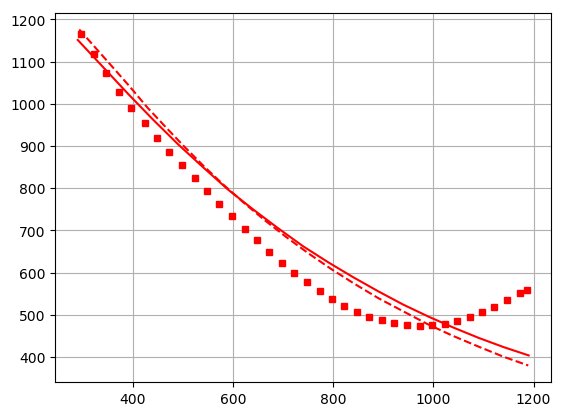

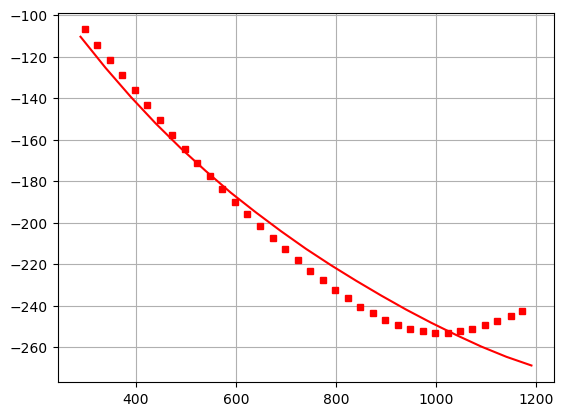

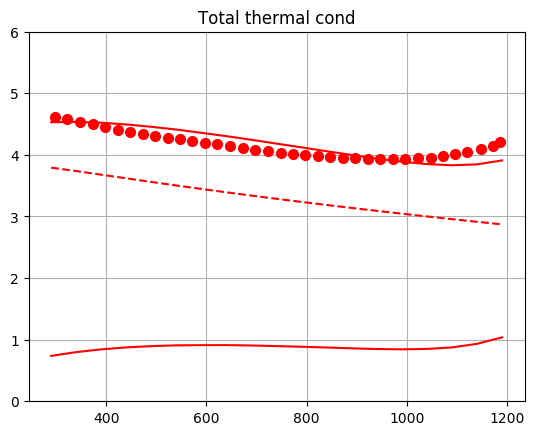

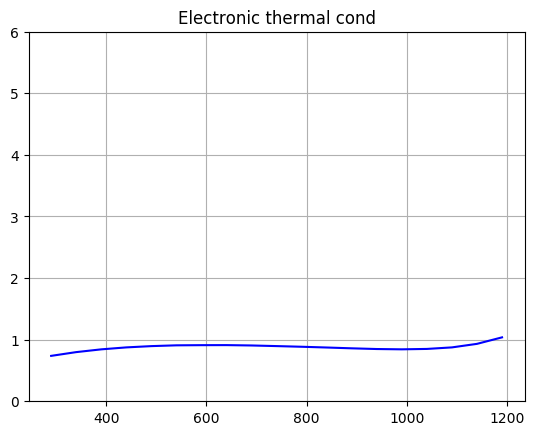

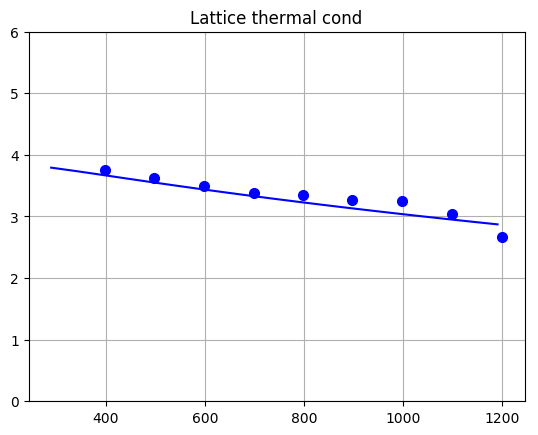

In [14]:
SiGe_Suin_EC_T=[50.0100000000000,60.0100000000000,70.0100000000000,80.0100000000000,90.0100000000000,100.010000000000,
110.010000000000,120.010000000000,130.010000000000,140.010000000000,150.010000000000,160.010000000000,170.010000000000,
180.010000000000,190.010000000000,200.010000000000,210.010000000000,220.010000000000,230.010000000000,240.010000000000,
250.010000000000,260.010000000000,270.010000000000,280.010000000000,290.010000000000,300.010000000000,310.010000000000,
320.010000000000,330.010000000000,340.010000000000,350.010000000000,360.010000000000,370.010000000000,380.010000000000,
390.010000000000,400.010000000000,410.010000000000,420.010000000000,430.010000000000,440.010000000000,450.010000000000,
460.010000000000,470.010000000000,480.010000000000,490.010000000000,500.010000000000,510.010000000000,520.010000000000,
530.010000000000,540.010000000000,550.010000000000,560.010000000000,570.010000000000,580.010000000000,590.010000000000,
600.010000000000,610.010000000000,620.010000000000,630.010000000000,640.010000000000,650.010000000000,660.010000000000,
670.010000000000,680.010000000000,690.010000000000,700.010000000000,710.010000000000,720.010000000000,730.010000000000,
740.010000000000,750.010000000000,760.010000000000,770.010000000000,780.010000000000,790.010000000000,800.010000000000]

SiGe_Suin_Green_EC_E=[197056.235797164,194320.869638783,191639.726004170,189004.089980826,186404.129258986,183831.389714421,
181278.561149160,178739.838327999,176211.078554261,173689.820032834,171175.087928433,168667.170965295,166167.387785872,
163677.780145979,161200.893579582,158739.569628146,156296.773858473,153875.463875003,151478.490325157,149108.525922849,
146768.017906391,144459.159338732,142183.875109414,139943.819068554,137740.379339050,135574.689421683,133447.643191776,
131359.912309890,129311.964919516,127304.084786733,125336.390268020,123408.852670586,121521.313710611,119673.501882254,
117865.047631702,116095.497291016,114364.325770554,112670.948039989,111014.729449324,109394.994954804,107811.037323671,
106262.124394220,104747.505469873,103266.416923878,101818.087088848,100401.740501025,99016.6015656697,97661.8977043105,
96336.8620403833,95040.7356748171,93772.7695985254,92532.2262843721,91318.3809970343,90130.5228553333,88967.9556780466,
87829.9986409496,86715.9867698647,85625.2712917903,84557.2198637538,83511.2166968223,82486.6625908072,81482.9748932318,
80499.5873949161,79535.9501727694,78591.5293893648,77665.8070576933,76758.2807785317,75868.4634569961,74995.8830040928,
74140.0820284097,73300.6175224935,72477.0605479449,71668.9959227969,70876.0219143384,70097.7499401889,69333.8042801100]

SiGe_Suin_Blue_EC_E=[105217.718423598,103894.351590207,102597.378241505,101326.103752608,100076.690205017,98847.7335877961,97637.2784136888,
96443.5832046020,95265.1079304967,94100.5283678664,92948.7829164667,91809.0016256134,90680.5818602652,89563.0857717702,
88456.2529938136,87359.9754708476,86274.2533521397,85199.1751237078,84134.8966696508,83081.6197375549,82039.5744885061,
81009.0055398650,79990.1607327244,78983.2822128468,77988.5995736031,77006.3247748143,76036.6485395295,75079.7379700720,
74135.7351443028,73204.7564993546,72286.8928226126,71382.2097211777,70490.7484441301,69612.5269642873,68747.5412407379,
67895.7665996923,67057.1591831364,66231.6574263637,65419.1835337387,64619.6449294639,63832.9356659927,63058.9377775023,
62297.5225696718,61548.5518400721,60811.8790258860,60087.3502775685,59374.8054585196,58674.0790719648,57985.0011169990,
57307.3978765571,56641.0926401712,55985.9063649732,55341.6582783843,54708.1664260703,54085.2481687875,53472.7206315772,
52870.4011089235,52278.1074291506,51695.6582813696,51122.8735081021,50559.5743665851,50005.5837616225,49460.7264527182,
48924.8292380895,48397.7211180361,47879.2334400197,47369.2000276938,46867.4572960151,46373.8443544707,45888.2031003578,
45410.3783039662,44940.2176874331,44477.5719989557,44022.2950840000,43574.2439550117,43133.2788611721]

SiGe_Suin_Pink_EC_E=[82556.0023800115,81678.0385079951,80812.0296722989,79958.1987557615,79114.3165600192,78278.9254780743,
77450.6590202426,76628.3230121537,75810.9323951141,74997.7248530249,74188.1713761495,73381.9573163729,72578.9419993544,
71779.1589659886,70982.7628736542,70190.0062645706,69401.2154894147,68616.7659645658,67837.0623647944,67062.5228167014,
66293.5661792147,65530.6020846545,64774.0234115581,64024.2008027958,63281.4788707468,62546.1737643178,61818.5718199933,
61098.9290655626,60387.4713801360,59684.3951499867,58989.8682891142,58304.0315192323,57626.9998243901,56958.8640138868,
56299.6923412270,55649.5321389090,55008.4114384640,54376.3405529461,53753.3136053002,53139.3099909937,52534.2957672122,
51938.2249639862,51351.0408150007,50772.6769076076,50203.0582531140,49642.1022791472,49089.7197469245,48545.8155965934,
48010.2897242368,47483.0376942108,46963.9513907803,46452.9196128161,45949.8286153999,45454.5626020447,44967.0041711185,
44487.0347199124,44014.5348096343,43549.3844944385,43091.4636174350,42640.6520764505,42196.8300621479,41759.8782709546,41329.6780950939,
40906.1117918765,40489.0626342670,40078.4150446369,39674.0547134453,39275.8687045742,38883.7455488544,38497.5753272869,38117.2497453651,
37742.6621998331,37373.7078391482,37010.2836188567,36652.2883530403,36299.6227629359]

SiGe_Suin_Black_EC_E=[55622.0110551947,55136.9987140034,54655.7461666811,54176.7050907652,53698.6859337766,53220.6435980166,52741.7187796517,
52261.2715226442,51778.9154868774,51294.4685778328,50807.9540688773,50319.5522408717,49829.5628688318,49338.3759903383,
48846.4405788305,48354.2400831509,47862.2731101948,47371.0382839007,46881.0228407008,46392.6943614876,45906.4950443235,
45422.8379814638,44942.1049992142,44464.6456911390,43990.7773463343,43520.7855346351,43054.9251603354,42593.4218378963,
42136.4734762196,41684.2519849564,41236.9050375587,40794.5578425274,40357.3148874124,39925.2616303102,39498.4661214778,
39076.9805436780,38660.8426645807,38250.0771978062,37844.6970719553,37444.7046087412,37050.0926127418,36660.8453761445,
36276.9396026062,35898.3452545883,35525.0263288096,35156.9415644886,34794.0450890119,34436.2870055533,34083.6139270076,
33735.9694604076,33393.2946457800,33055.5283531661,32722.6076413099,32394.4680812822,32071.0440481056,31752.2689831920,
31438.0756302719,31128.3962472375,30823.1627961888,30522.3071137963,30225.7610639480,29933.4566745123,29645.3262599303,
29361.3025312366,29081.3186950153,28805.3085427084,28533.2065316193,28264.9478588865,28000.4685296476,27739.7054205593,
27482.5963398025,27229.0800846594,26979.0964977225,26732.5865227674,26489.4922612983,26249.7570307576]

SiGe_Suin_Blue_SC_S=[-21.7523104187788,-25.9457204002138,-30.0885220308013,-34.1752109691754,-38.2059474144304,
-42.1797418609697,-46.0954759095530,-49.9518978637138,-53.7477624431973,-57.4819058446367,-61.1533311583672,
-64.7612422247736,-68.3050547503879,-71.7845188779827,-75.1995705465003,-78.5504115593362,-81.8374802613841,
-85.0614045329619,-88.2229816539391,-91.3231552953944,-94.3629887985398,-97.3436405915296,-100.266342677214,-103.132381777112,
-105.943082893110,-108.699795171442,-111.403879920946,-114.056700579642,-116.659614414779,-119.213965736556,-121.721080428019,
-124.182261597514,-126.598786191152,-128.971902415277,-131.302827839417,-133.592748066665,-135.842815874843,-138.054150745006,
-140.227838706636,-142.364932439552,-144.466451581937,-146.533383201924,-148.566682397137,-150.567272992435,-152.536048311113,
-154.473871999049,-156.381578884797,-158.259975861592,-160.109842779774,-161.931933339902,-163.726975978875,-165.495674742295,
-167.238710137589,-168.956739963088,-170.650400108826,-172.320305325328,-173.967049956605,-175.591208633931,-177.193336926711,
-178.773971946652,-180.333632901168,-181.872821591559,-183.392022851104,-184.891704917703,-186.372319735156,-187.834303176590,
-189.278075182972,-190.704039808980,-192.112585167937,-193.504083266858,-194.878889722103,-196.237343345530,-197.579765590541,
-198.906459846879,-200.217710572716,-201.513782252026]

SiGe_Suin_Pink_SC_S=[-23.9499856092501,-28.5862197803218,-33.1642400862037,-37.6838942251103,-42.1417891074287,
-46.5354848035996,-50.8622421316613,-55.1193861772030,-59.3044095674959,-63.4152345459587,-67.4500696522240,
-71.4077208901757,-75.2873965709307,-79.0887646432600,-82.8119326519797,-86.4573644907467,-90.0258385322594,
-93.5184002417533,-96.9363116028287,-100.281005956880,-103.554048716190,-106.757103269786,-109.891901788896,
-112.960220623040,-115.963859843036,-118.904626440842,-121.784320698673,-124.604725267716,-127.367596543106,
-130.074657967341,-132.727594941413,-135.328051066670,-137.877625481650,-140.377871093353,-142.830293534574,
-145.236350706119,-147.597452786277,-149.914962609895,-152.190196336330,-154.424424339805,-156.618872267610,
-158.774722221604,-160.893114026721,-162.975146557200,-165.021879096728,-167.034332713749,-169.013491636757,
-170.960304617744,-172.875686274481,-174.760518404568,-176.615651265625,-178.441904817611,-180.240069924170,
-182.010909510748,-183.755159677845,-185.473530768178,-187.166708386816,-188.835354373476,-190.480107726201,
-192.101585475562,-193.700383508339,-195.277077339430,-196.832222830361,-198.366356852445,-199.879997892153,-201.373646595803,
-202.847786250179,-204.302883195038,-205.739387162987,-207.157731541534,-208.558333551541,-209.941594335643,
-211.307898949608,-212.657616248962,-213.991098662638,-215.308681844780]

SiGe_Suin_Black_SC_S=[-28.1599769459265,-33.6192218367073,-39.0090505459788,-44.3236547272048,-49.5568977453714,
-54.7025528560025,-59.7547463145185,-64.7084385641298,-69.5594720018437,-74.3049058184381,-78.9427940698786,
-83.4722516345093,-87.8932622874908,-92.2065532487622,-96.4134649761981,-100.515820970825,-104.515815041831,
-108.415915324588,-112.218783783354,-115.927210057589,-119.544058018839,-123.072223240943,-126.514599634887,
-129.874053670756,-133.153404805842,-136.355410939410,-139.482757904828,-142.538052178320,-145.523816131048,
-148.442485275873,-151.296407064680,-154.087840878582,-156.818958924410,-159.491847808778,-162.108510608091,
-164.670869290979,-167.180767380094,-169.639972765156,-172.050180598578,-174.413016220957,-176.730038076169,
-179.002740585939,-181.232556961430,-183.420861935853,-185.568974406845,-187.678159981188,-189.749633417410,
-191.784560963976,-193.784062592523,-195.749214126718,-197.681049268238,-199.580561521835,-201.448706021787,
-203.286401262075,-205.094530732516,-206.873944462887,-208.625460476565,-210.349866154819,-212.047919512199,
-213.720350382789,-215.367861516277,-216.991129581930,-218.590806077618,-220.167518140008,-221.721869251003,
-223.254439834386,-224.765787735464,-226.256448575369,-227.726935970430,-229.177741605876,-230.609335151900,
-232.022164008944,-233.416652867900,-234.793203069827,-236.152191748693,-237.493970739658]
SiGe_SA_162_Bulk_KC_T=[398.7219168438,498.0855086789,598.5416158272,698.9878915666,797.1262440682,897.5381098765,
997.8565773003,1097.3037361109,1199.1374694305]
SiGe_SA_162_Bulk_KC_KL=[3.7593499332,3.62237734,3.494337284,3.3752157204,3.3497102368,3.2618033964,3.2586222334,
3.0458424552,2.6680986582]
SiGe_Min_1700_Bulk_KC_T=[314.5631067961,444.0129449838,499.2448759439,577.7777777778,769.3635382956,966.1272923409,
    1032.5782092772,1105.9331175836,1168.932038835,1188.7810140237]
SiGe_Min_1700_Bulk_KC_K=[4.6835063051,4.5239984377,4.4312520924,4.3076219172,4.4329985493,4.1911672804,4.0622865752,
4.2179332664,4.4666164491,4.3891585761]
SiGe_Min_22_Bulk_KC_T=[314.5631067961,378.4250269687,554.476806904,683.9266450917,814.2394822006,903.9913700108,
    973.0312837109]
SiGe_Min_22_Bulk_KC_K=[7.1197132017,6.4011605848,5.1350574713,4.6289978797,4.3608749024,4.4855931258,4.7291429528]
SiGe_Dis_162_Bulk_KC_T=[323.4130104234,436.3766249262,465.5560008689,494.6582798193,568.7099409229,676.8421439083,
    861.4563988974,997.8960475554,1141.7663777569,1201.6652338456]
SiGe_Dis_162_Bulk_KC_K=[4.6738529713,4.5204119777,4.5006535608,4.430757327,4.3128769847,4.2031161293,3.9957878466,
4.065915243,4.2121420299,4.3719065138]



figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="r")
#plot(Ts,sigmas[:,2,2]/100,linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100,linestyle="-",color="g")
#plot(Ts,sigmas[:,4,4]/100,linestyle="-",color="m")

plot(SiGe_Minnich_17e19_Exp_EC_T,SiGe_Minnich_17e19_Exp_EC_E, linestyle="None",marker="s",markersize=4,color="r")
plot(SiGe_Minnich_17e19_EC_badfit_T,SiGe_Minnich_17e19_EC_badfit_E, linestyle="--",color="r")
#plot(Ts,(6^(2/3))*sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,(6^(2/3))*sigmas[:,2,2]/100,linestyle="-",color="r")
#plot(Ts,(6^(2/3))*sigmas[:,3,3]/100,linestyle="-",color="g")
#plot(Ts,(6^(2/3))*sigmas[:,4,4]/100,linestyle="-",color="m")
#plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100,linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100,linestyle="-",color="g")
#plot(Ts,sigmas[:,4,4]/100,linestyle="-",color="m")
#plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E/100,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
#plot(SiGe_Min_02Ge_Bulk_EC_T,SiGe_Min_02Ge_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="b")
#plot(SiGe_Min_02Ge2_Bulk_EC_T,SiGe_Min_02Ge2_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="b")
#plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E/100, linestyle="None",marker="o",markersize=4,color="b")
#plot(SiGe_Vin_163_Bulk_EC_T,1e3./SiGe_Vin_163_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="r")
#plot(SiGe_Vin_41_Bulk_EC_T,1e3./SiGe_Vin_41_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="g")
#plot(SiGe_Vin_68_Bulk_EC_T,1e3./SiGe_Vin_68_Bulk_EC_E, linestyle="None",marker="s",markersize=4,color="m")
grid()

figure()
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="m")

plot(SiGe_Minnich_17e19_SC_T,SiGe_Minnich_17e19_SC_S, linestyle="None",marker="s",markersize=4,color="r")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="b")
#plot(SiGe_Vin_163_Bulk_SC_T,SiGe_Vin_163_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="r")
#plot(SiGe_Vin_41_Bulk_SC_T,SiGe_Vin_41_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="g")
#plot(SiGe_Vin_68_Bulk_SC_T,SiGe_Vin_68_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="m")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()
figure()
title("Total thermal cond")
plot(Ts,kt[:,1,1]+kes[:,1,1],linestyle="-",color="r")
plot(Ts,kes[:,1,1],linestyle="-",color="r")
plot(Ts,kt[:,1,1],linestyle="--",color="r")

#plot(Ts,kt[:,2,2]+kes[:,2,2],linestyle="-",color="r")
#plot(Ts,kt[:,3,3]+kes[:,3,3],linestyle="-",color="g")
#plot(Ts,kt[:,4,4]+kes[:,4,4],linestyle="-",color="m")
plot(SiGe_Minnich_17e19_KC_T,SiGe_Minnich_17e19_KC_K,linestyle="None",marker="o",markersize=7,color="r")
#plot(SiGe_Min_1700_Bulk_KC_T,SiGe_Min_1700_Bulk_KC_K,linestyle="None",marker="o",markersize=7,color="g")
#plot(SiGe_Min_22_Bulk_KC_T,SiGe_Min_22_Bulk_KC_K,linestyle="None",marker="o",markersize=7,color="m")
ylim(0.0,6.0)
grid()
figure()
title("Electronic thermal cond")
plot(Ts,kes[:,1,1],linestyle="-",color="b")
#plot(Ts,kes[:,2,2],linestyle="-",color="r")
#plot(Ts,kes[:,3,3],linestyle="-",color="g")
#plot(Ts,kes[:,4,4],linestyle="-",color="m")
ylim(0.0,6.0)
grid()
figure()
title("Lattice thermal cond")
plot(Ts,kt[:,1,1],linestyle="-",color="b")
#plot(Ts,kt[:,2,2],linestyle="-",color="r")
#plot(Ts,kt[:,3,3],linestyle="-",color="g")
#plot(Ts,kt[:,4,4],linestyle="-",color="m")
plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
ylim(0.0,6.0)
grid()